In [1]:
import os
import cv2
import numpy as np

X = []
y = []

dataset_dir = "captured_images"
IMG_SIZE = 32   # ← dùng 32x32 cho MLP

for label in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label)

    if not os.path.isdir(label_path):
        continue

    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        # resize về 32x32
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # normalize
        img = img / 255.0

        X.append(img)
        y.append(int(label))   # label = 0 hoặc 1

# chuyển sang numpy
X = np.array(X)
y = np.array(y).reshape(-1, 1)   # (N, 1)

# FLATTEN cho mạng 1 hidden layer
X = X.reshape(len(X), -1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (102, 3072)
y shape: (102, 1)


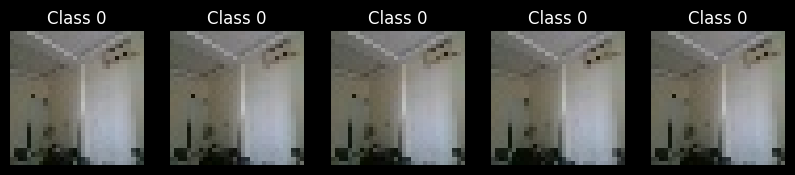

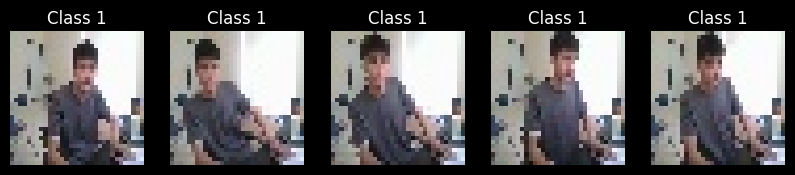

In [2]:
import matplotlib.pyplot as plt
import random
import os
import cv2

dataset_dir = "captured_images"
IMG_SIZE = 32

def show_images(label, n=5):
    folder = os.path.join(dataset_dir, str(label))
    images = random.sample(os.listdir(folder), n)

    plt.figure(figsize=(n * 2, 2))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Class {label}")

    plt.show()

show_images(0)
show_images(1)


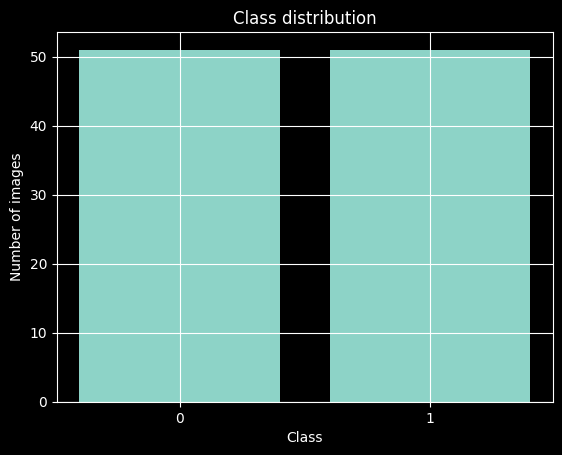

In [3]:
import matplotlib.pyplot as plt
import os

labels = []
counts = []

for label in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label)
    if os.path.isdir(label_path):
        labels.append(label)
        counts.append(len(os.listdir(label_path)))

plt.figure()
plt.bar(labels, counts)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.grid()
plt.title("Class distribution")
plt.show()


In [4]:
np.random.seed(42)

idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]


In [5]:
split = int(0.8 * len(X))

X_train = X[:split]
y_train = y[:split]

X_val = X[split:]
y_val = y[split:]


In [6]:
print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)


Train: (81, 3072) (81, 1)
Val  : (21, 3072) (21, 1)


In [7]:
from model import *
print("y_train unique:", np.unique(y_train, return_counts=True))
print("y_val unique:", np.unique(y_val, return_counts=True))


y_train unique: (array([0, 1]), array([43, 38]))
y_val unique: (array([0, 1]), array([ 8, 13]))


In [9]:
para = train(X_train, y_train, 600, 0.001)

epoch: 0, loss: 0.6932610229043343
epoch: 1, loss: 0.693247681639888
epoch: 2, loss: 0.6932343852589824
epoch: 3, loss: 0.6932211385397008
epoch: 4, loss: 0.6932079174651239
epoch: 5, loss: 0.6931948650317059
epoch: 6, loss: 0.6931818622476713
epoch: 7, loss: 0.6931689170033265
epoch: 8, loss: 0.6931561283934093
epoch: 9, loss: 0.6931432326774364
epoch: 10, loss: 0.6931303247819927
epoch: 11, loss: 0.6931177682226304
epoch: 12, loss: 0.6931054752232324
epoch: 13, loss: 0.6930936632348467
epoch: 14, loss: 0.6930821254018864
epoch: 15, loss: 0.6930708263354296
epoch: 16, loss: 0.6930597745612909
epoch: 17, loss: 0.6930489534258312
epoch: 18, loss: 0.6930382861778971
epoch: 19, loss: 0.6930278158193683
epoch: 20, loss: 0.6930174236716636
epoch: 21, loss: 0.6930070494472713
epoch: 22, loss: 0.6929966947253141
epoch: 23, loss: 0.6929863908289084
epoch: 24, loss: 0.6929761681904796
epoch: 25, loss: 0.692966014217425
epoch: 26, loss: 0.6929559541834307
epoch: 27, loss: 0.6929459020453729
epoc

In [10]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(para, f)


In [11]:
y_pred = predict(X_val, para)
print("Accuracy:", accuracy(y_val, y_pred))


Accuracy: 1.0


In [12]:
y_pred = predict(X_train, para)
print("Accuracy:", accuracy(y_train, y_pred))

Accuracy: 1.0


In [30]:
# khao sat cac yeu to

In [31]:
from model1 import *

In [32]:
layer_configs = [
    [X.shape[1], 1],            # no hidden
    [X.shape[1], 8, 1],          # 1 hidden
    [X.shape[1], 8, 8, 1],       # 2 hidden
    [X.shape[1], 8, 8, 8, 1]     # 3 hidden
]

for layers in layer_configs:
    para = train_model(
        X_train, y_train,
        layers=layers, lr=0.01
    )
    y_pred = predict(X_val, para)
    y_hat = predict(X_train, para)
    print(f"layer {layers} accuracy train:", accuracy(y_train, y_hat))
    print(f"layer {layers} accuracy val:", accuracy(y_val, y_pred))
    print("\n")




layer [3072, 1] accuracy train: 1.0
layer [3072, 1] accuracy val: 1.0


layer [3072, 8, 1] accuracy train: 1.0
layer [3072, 8, 1] accuracy val: 1.0


layer [3072, 8, 8, 1] accuracy train: 0.5308641975308642
layer [3072, 8, 8, 1] accuracy val: 0.38095238095238093


layer [3072, 8, 8, 8, 1] accuracy train: 0.5308641975308642
layer [3072, 8, 8, 8, 1] accuracy val: 0.38095238095238093




In [33]:
neurons = [4, 8, 16, 32]

for n in neurons:
    layers = [X.shape[1], n, 1]
    para = train_model(
    X_train, y_train,
    layers=layers, lr=0.01
    )

    y_hat_train = predict(X_train, para)
    y_hat_val   = predict(X_val, para)

    print(f"neuron {n} accuracy train:", accuracy(y_train, y_hat_train))
    print(f"neuron {n} accuracy val:", accuracy(y_val, y_hat_val))
    print()



neuron 4 accuracy train: 1.0
neuron 4 accuracy val: 1.0

neuron 8 accuracy train: 1.0
neuron 8 accuracy val: 1.0

neuron 16 accuracy train: 1.0
neuron 16 accuracy val: 1.0

neuron 32 accuracy train: 1.0
neuron 32 accuracy val: 1.0



In [34]:
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    layers = [X.shape[1], 8, 1]
    para = train_model(
        X_train, y_train,
        layers=layers, lr=0.01
    )
    y_pred = predict(X_val, para)
    y_hat = predict(X_train, para)
    print(f"lr {lr} accuracy train:", accuracy(y_train, y_hat))
    print(f"lr {lr} accuracy val:", accuracy(y_val, y_pred))
    print("\n")

lr 0.0001 accuracy train: 1.0
lr 0.0001 accuracy val: 1.0


lr 0.001 accuracy train: 1.0
lr 0.001 accuracy val: 1.0


lr 0.01 accuracy train: 1.0
lr 0.01 accuracy val: 1.0


lr 0.1 accuracy train: 1.0
lr 0.1 accuracy val: 1.0




In [35]:
import matplotlib.pyplot as plt
import random

def visualize_predictions(X, y_true, para, img_shape=(32, 32, 3), n_samples=5):
    """
    X: (N, D) flattened images
    y_true: (N, 1)
    """
    idxs = random.sample(range(X.shape[0]), n_samples)

    y_pred = predict(X[idxs], para)

    plt.figure(figsize=(15, 3))

    for i, idx in enumerate(idxs):
        img = X[idx].reshape(img_shape)

        true_label = int(y_true[idx][0])
        pred_label = int(y_pred[i][0])

        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img.astype(np.uint8))
        plt.axis("off")
        plt.title(f"True: {true_label}\nPred: {pred_label}",
                  color="green" if true_label == pred_label else "red")

    plt.show()


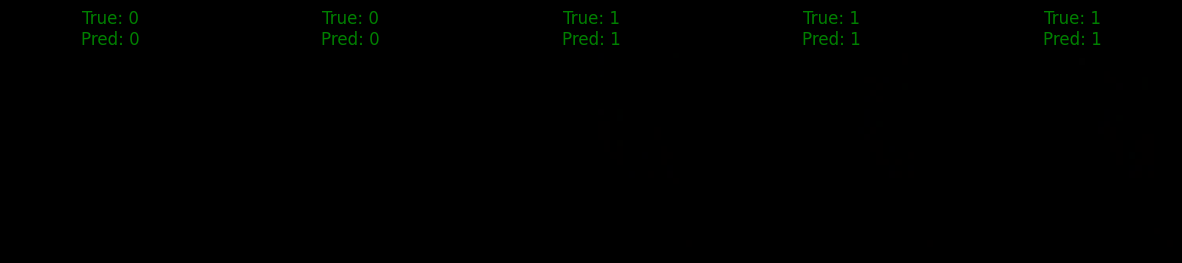

In [36]:
visualize_predictions(X_val, y_val, para, img_shape=(32, 32, 3), n_samples=5)

